Importing from Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

Loading Data

In [3]:
df = pd.read_csv('./creditcard.csv')

print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

Getting Initial informations about Data

In [4]:
print("First few rows of the dataset:")
print(df.head())
print("\nDataset statistics:")
print(df.describe())

First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

Searching for Missing Values

In [5]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Data Vizualisation ( Class Distribution )
/// We see that Data is Imbalanced

C:\Users\DELL\AppData\Local\Temp\ipykernel_15840\1251419985.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


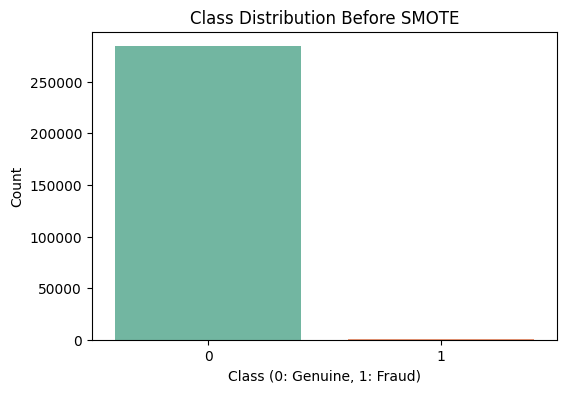

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class (0: Genuine, 1: Fraud)")
plt.ylabel("Count")
plt.show()

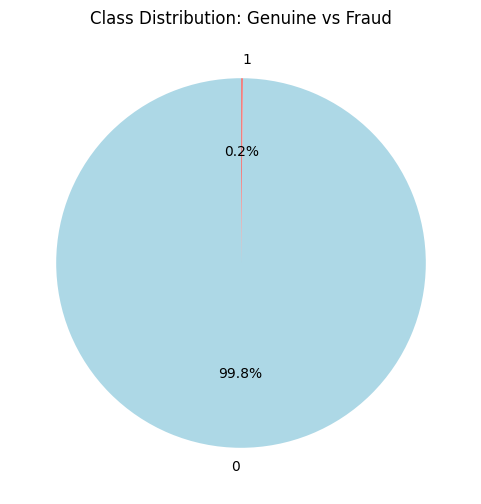

In [7]:
plt.figure(figsize=(6, 6))
df['Class'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title("Class Distribution: Genuine vs Fraud")
plt.ylabel('')
plt.show()

Splitting and Normalizing Data

In [9]:
X = df.drop(columns=['Class']) 
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Handling Data Imbalance by SMOTE

In [10]:
print("Before oversampling, counts of fraud transactions in training set:", sum(y_train == 1))
print("Before oversampling, counts of genuine transactions in training set:", sum(y_train == 0))

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)

print("After oversampling, counts of fraud transactions:", sum(y_train_sm == 1))
print("After oversampling, counts of genuine transactions:", sum(y_train_sm == 0))

Before oversampling, counts of fraud transactions in training set: 394
Before oversampling, counts of genuine transactions in training set: 227451
After oversampling, counts of fraud transactions: 227451
After oversampling, counts of genuine transactions: 227451


C:\Users\DELL\AppData\Local\Temp\ipykernel_15840\401824883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_sm, palette='Set1')


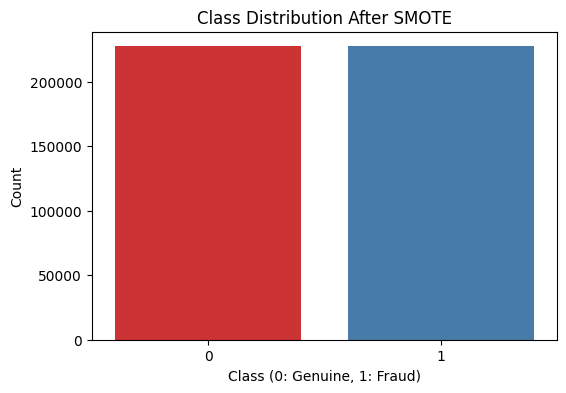

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_sm, palette='Set1')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class (0: Genuine, 1: Fraud)")
plt.ylabel("Count")
plt.show()

Building two Classification Models :
1- Logistic Regression
2- Random Forest Classifier

In [12]:
# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_sm, y_train_sm)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf_clf.predict(X_test_scaled)

Comparaing the two models /// We see that Random Forest Classifier has a better Precision and F1-score 

In [13]:
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)

rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print(f"\nLogistic Regression - Precision: {log_reg_precision:.2f}, Recall: {log_reg_recall:.2f}, F1-score: {log_reg_f1:.2f}")
print(f"Random Forest Classifier - Precision: {rf_precision:.2f}, Recall: {rf_recall:.2f}, F1-score: {rf_f1:.2f}")


Logistic Regression - Precision: 0.06, Recall: 0.92, F1-score: 0.11
Random Forest Classifier - Precision: 0.87, Recall: 0.83, F1-score: 0.85


Visualizing the Confusion matrix of the Random Forest Model

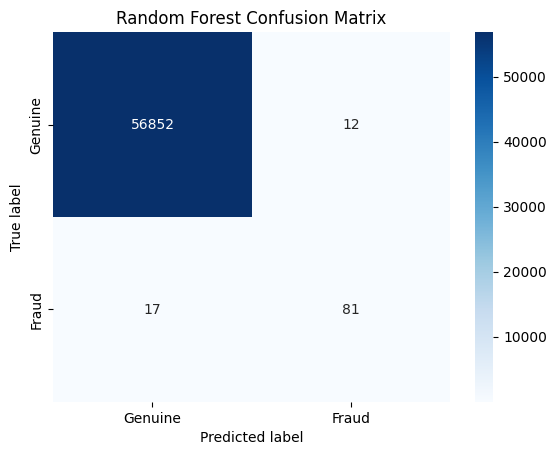

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fraud'], yticklabels=['Genuine', 'Fraud'])
plt.title("Random Forest Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()